<h1><center>Programa de Cerchas</center></h1>

In [1]:
import numpy as np
import pandas as pd

#Bibliotecas
import numpy as np
from sympy import symbols, Eq, solve, init_printing
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import Analisis_cerchas
from Analisis_cerchas import graficar, plot_colored_matrix

### Datos de entrada

In [2]:
#número de nodos
Nn = 6

#Número de elementos
Ne = 9

#Número de grados de libertas de la estructura, NGL
NGL = 2*Nn

### Matriz grados de libertad (MGL) iniciales y finales de cada elemento

In [3]:
MGL=[
    [0, 1, 10, 11],
    [10, 11, 2, 3],
    [2, 3, 7, 4],
    [7, 4, 5, 6],
    [5, 6, 8, 9],
    [8, 9, 0, 1],
    [0, 1, 7, 4],
    [8, 9, 2, 3],
    [5, 6, 10, 11]]
       

### Matriz de áreas

In [4]:
MA = [[700],
      [700],
      [700],
      [700],
      [700],
      [700],
      [1000],
      [1000],
      [1000]]

### Matriz de modulo de elasticidad

In [5]:
ME = [[200],
      [200],
      [200],
      [200],
      [200],
      [200],
      [200],
      [200],
      [200]]

###  Matriz con coordenadas iniciales y finales de cada elemento

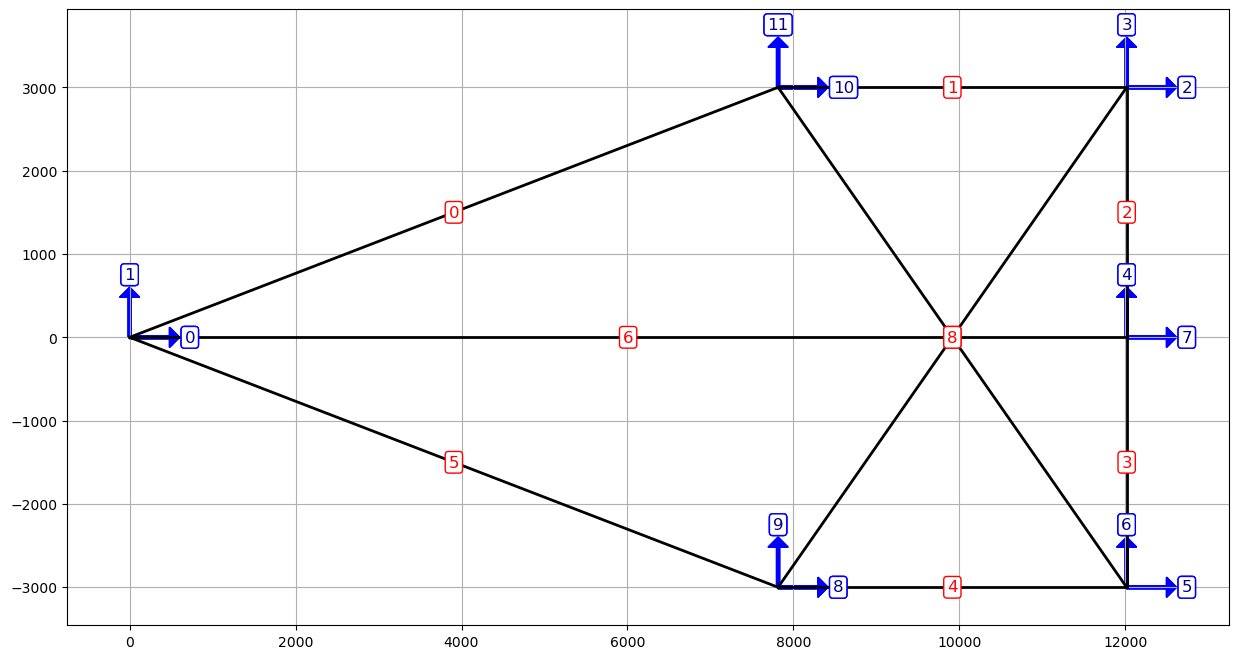

In [6]:
MC = [[0, 0, 7815.27, 3000],
      [7815.27, 3000, 12016.5, 3000],
      [12016.5, 3000, 12016.5, 0],
      [12016.5, 0, 12016.5, -3000],
      [12016.5, -3000, 7815.27, -3000],
      [7815.27, -3000, 0, 0],
      [0, 0, 12016.5, 0],
      [7815.27, -3000, 12016.5, 3000],
      [12016.5, -3000, 7815.27, 3000]]

graficar(MC, MGL)

### Matriz de longitudes de cada elemento

In [7]:
𝑀𝐿 = np.zeros((Ne,1))

for i in range (Ne):
    ML[i,0]=np.sqrt(((MC[i][2]-MC[i][0]))**2 + (MC[i][3]-MC[i][1])**2)

pd.DataFrame(ML)

,0
0,8371.286948
1,4201.230000
2,3000.000000
3,3000.000000
4,4201.230000
5,8371.286948
6,12016.500000
7,7324.638797
8,7324.638797


### Matriz de rigidez local

In [8]:
MAL = np.zeros ((Ne,4,4))
for i in range (Ne):
    MAL[i,0,0] = (MA[i][0]*ME[i][0])/ML[i][0]
    MAL[i,0,2] = -MAL[i,0,0]
    MAL[i,2,0] = -MAL[i,0,0]
    MAL[i,2,2] = MAL[i,0,0]

for i in range(Ne):
    print(f"Matriz MAL[{i}]")
    print(pd.DataFrame(MAL[i]))
    print("\n")

Matriz MAL[0]
           0    1          2    3
0  16.723832  0.0 -16.723832  0.0
1   0.000000  0.0   0.000000  0.0
2 -16.723832  0.0  16.723832  0.0
3   0.000000  0.0   0.000000  0.0


Matriz MAL[1]
           0    1          2    3
0  33.323574  0.0 -33.323574  0.0
1   0.000000  0.0   0.000000  0.0
2 -33.323574  0.0  33.323574  0.0
3   0.000000  0.0   0.000000  0.0


Matriz MAL[2]
           0    1          2    3
0  46.666667  0.0 -46.666667  0.0
1   0.000000  0.0   0.000000  0.0
2 -46.666667  0.0  46.666667  0.0
3   0.000000  0.0   0.000000  0.0


Matriz MAL[3]
           0    1          2    3
0  46.666667  0.0 -46.666667  0.0
1   0.000000  0.0   0.000000  0.0
2 -46.666667  0.0  46.666667  0.0
3   0.000000  0.0   0.000000  0.0


Matriz MAL[4]
           0    1          2    3
0  33.323574  0.0 -33.323574  0.0
1   0.000000  0.0   0.000000  0.0
2 -33.323574  0.0  33.323574  0.0
3   0.000000  0.0   0.000000  0.0


Matriz MAL[5]
           0    1          2    3
0  16.723832  0.0 -16.

### Matriz de transformación

In [9]:
MAT = np.zeros((Ne,4,4))
for i in range (Ne):
    MAT[i,0,0] = (MC[i][2] - MC[i][0])/ML[i][0]
    MAT[i,1,0] = (MC[i][3] - MC[i][1])/ML[i][0]
    MAT[i,2,2] = MAT[i,0,0]
    MAT[i,3,2] = MAT[i,1,0]


### Matriz de rigidez global

In [10]:
MAG = np.zeros((Ne,4,4))
for i in range (Ne):
    MAG[i] = np.dot(np.dot(MAT[i],MAL[i]),np.transpose(MAT[i]))

for i in range(Ne):
    print(f"Matriz MAG[{i}]")
    print(pd.DataFrame(MAG[i]))
    print("\n")


Matriz MAG[0]
           0         1          2         3
0  14.576032  5.595213 -14.576032 -5.595213
1   5.595213  2.147800  -5.595213 -2.147800
2 -14.576032 -5.595213  14.576032  5.595213
3  -5.595213 -2.147800   5.595213  2.147800


Matriz MAG[1]
           0    1          2    3
0  33.323574  0.0 -33.323574  0.0
1   0.000000  0.0   0.000000  0.0
2 -33.323574  0.0  33.323574  0.0
3   0.000000  0.0   0.000000  0.0


Matriz MAG[2]
     0          1    2          3
0  0.0   0.000000  0.0   0.000000
1  0.0  46.666667  0.0 -46.666667
2  0.0   0.000000  0.0   0.000000
3  0.0 -46.666667  0.0  46.666667


Matriz MAG[3]
     0          1    2          3
0  0.0   0.000000  0.0   0.000000
1  0.0  46.666667  0.0 -46.666667
2  0.0   0.000000  0.0   0.000000
3  0.0 -46.666667  0.0  46.666667


Matriz MAG[4]
           0    1          2    3
0  33.323574  0.0 -33.323574  0.0
1   0.000000  0.0   0.000000  0.0
2 -33.323574  0.0  33.323574  0.0
3   0.000000  0.0   0.000000  0.0


Matriz MAG[5]
      

### Matriz de rigidez global de la estructura

In [11]:
KG = np.zeros((NGL,NGL))
for i in range (Ne):
    for j in range (4):
        for k in range (4):
            KG[int(MGL[i][k]),int(MGL[i][j])] = KG[int(MGL[i][k])][int(MGL[i][j])] + MAG[i][j][k]

Vista_KG = pd.DataFrame(KG)

Vista_KG

,0,1,2,3,4,5,6,7,8,9,10,11
0,45.795846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.643781,-14.576032,5.595213,-14.576032,-5.595213
1,0.000000,4.295600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.595213,-2.147800,-5.595213,-2.147800
2,0.000000,0.000000,42.306634,12.829185,0.000000,0.000000,0.000000,0.000000,-8.983059,-12.829185,-33.323574,0.000000
3,0.000000,0.000000,12.829185,64.988708,-46.666667,0.000000,0.000000,0.000000,-12.829185,-18.322041,0.000000,0.000000
4,0.000000,0.000000,0.000000,-46.666667,93.333333,0.000000,-46.666667,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,42.306634,-12.829185,0.000000,-33.323574,0.000000,-8.983059,12.829185
6,0.000000,0.000000,0.000000,0.000000,-46.666667,-12.829185,64.988708,0.000000,0.000000,0.000000,12.829185,-18.322041
7,-16.643781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.643781,0.000000,0.000000,0.000000,0.000000
8,-14.576032,5.595213,-8.983059,-12.829185,0.000000,-33.323574,0.000000,0.000000,56.882666,7.233972,0.000000,0.000000
9,5.595213,-2.147800,-12.829185,-18.322041,0.000000,0.000000,0.000000,0.000000,7.233972,20.469841,0.000000,0.000000


In [12]:
# Número de grados de libertad libres
NGLL = 7
# Número de grados de libertad restringidos (
NGLR = NGL - NGLL

## vectores de fuerza y desplazamientos

In [13]:
# Solo escribir los conocidos, incluir uno de los dos grados si se refiere a un patin
F0 = [[0],
     [-20],
     [0],
     [25],
     [0],
     [50],
     [0]]
# Las deformaciones conocidas
U1 = [[0],
     [0],
     [0],
     [0],
     [0]]

## Subdivida la matriz de rigidez global de la estructura en las matrices K0, K1, K2 y K3

In [14]:
K0 = KG[0:NGLL, 0:NGLL]
K1 = KG[0:NGLL, NGLL: NGL]
K2 = KG[NGLL: NGL,0:NGLL]
K3 = KG[NGLL:NGL,NGLL:NGL]

## desplazamientos en los grados de libertad libres (desplazamientos desconocidos) y las reacciones

In [15]:
Feff = F0 -np.dot(K1,U1)

U0 = np.dot((np.linalg.inv(K0)),Feff)

F1 = np.dot(K2, U0) + np.dot(K3,U1)

## fuerzas internas en coordenadas globales para cada elemento

In [16]:
# Vector de desplazamientos de los grados de libertad
U = np.concatenate((U0,U1))
# Matriz de almacenamiento de desplazamientos de cada elemento
MU = np.zeros((Ne,4,1))

for i in range(Ne):
    for j in range(4):
        MU[i,j,0] = U[int(MGL[i][j])][0]
# Matriz de almacenamiento de fuerzas internas globales de cada elemento
MFG = np.zeros((Ne,4,1))
for i in range(Ne):
    MFG[i] = np.dot(MAG[i],MU[i])

# Matriz de almacenamiento de fuerzas internas locales de cada elemento

In [17]:
MFL = np.zeros((Ne,4,1))
for i in range(Ne):
    MFL[i] = np.dot(np.transpose(MAT[i]),MFG[i])


##  matriz de almacenamiento de fuerzas internas

In [18]:
FELEM = np.zeros((Ne,1))
for i in range(Ne):
    FELEM[i,0] = -MFL[i,0,0]

In [19]:
#Fuerzas internas de los elementos
pd.DataFrame(FELEM)

,0
0,27.904290
1,-14.874415
2,3.757057
3,3.757057
4,52.630710
5,-27.904290
6,-0.000000
7,25.932814
8,-4.586514


In [20]:
# Desplazamientos de los grados de libertad
pd.DataFrame(U0)

,0
0,0.000000
1,-4.655927
2,-0.446363
3,1.471966
4,1.391457
5,1.579384
6,1.310949


In [21]:
# Reacciones
pd.DataFrame(F1)

,0
0,0.000000
1,-93.556025
2,-11.242943
3,43.556025
4,6.242943
